In [1]:
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import tensorflow as tf

import seaborn as sns
import random
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_4f7a6e0ff9dc4919a8c34923cea6ed22 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aVy5uLkU9PeK5C4X5xHgkDWrBfxbQ_3vFTghIzoCSj7V',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4f7a6e0ff9dc4919a8c34923cea6ed22.get_object(Bucket='ist718groupproject-donotdelete-pr-kkxwqqaibaz2pf',Key='ks-projects-201801.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [2]:
KickStarterData1 = df_data_1

In [3]:
KickStarterDataUS = KickStarterData1[KickStarterData1['currency'] == 'USD']

In [4]:
KickStarterDataUS.head(30)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.0


In [5]:
KickStarterDataUS.columns.tolist()

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [6]:
 KickStarterDataUS['goalvspledged'] = (KickStarterDataUS['pledged'] - KickStarterDataUS['goal']).round()
 KickStarterDataUS['metgoal'] = (KickStarterDataUS['pledged'] - KickStarterDataUS['goal']) > 0
 KickStarterDataUS.deadline = pd.to_datetime(KickStarterDataUS.deadline)
 KickStarterDataUS.launched = pd.to_datetime(KickStarterDataUS.launched)
  
 KickStarterDataUS['launched_diff'] = (KickStarterDataUS.launched - KickStarterDataUS.deadline)/ np.timedelta64(1, 'D')


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [7]:
 MetGoalWithState_GoalVsPledged = KickStarterDataUS.groupby(['metgoal','state'])['goalvspledged'].mean().to_frame()
 MetGoalWithState_GoalVsPledged

goalvspledged
metgoal state                    
False   canceled    -75380.359953
        failed      -59329.875177
        live        -96077.422192
        successful      -1.616396
        suspended  -281864.755319
        undefined    -3909.690213
True    canceled     12220.090517
        failed         272.000000
        live         25861.798479
        successful   13947.999830
        suspended    53118.754098
        undefined      642.729149

In [8]:
 StateVsLatenessInLaunch = KickStarterDataUS.groupby(['state'])['launched_diff'].mean().to_frame()
 StateVsLatenessInLaunch

,launched_diff
state,
canceled,-38.964395
failed,-34.920515
live,-38.847552
successful,-31.827942
suspended,-35.113056
undefined,-32.110072


In [9]:
Stats_KickStarted = KickStarterDataUS.agg({'pledged' : ['mean', 'min','max','median'], 'goal' : ['mean','min', 'max','median']})
Stats_KickStarted['goal'] = Stats_KickStarted.apply(lambda row: '$' + str(round(row['goal'] / 1,2)) + '', axis=1)
Stats_KickStarted['pledged'] = Stats_KickStarted.apply(lambda row: '$' + str(round(row['pledged'] / 1,2)) + '', axis=1)
Stats_KickStarted

,pledged,goal
mean,$9612.26,$43677.76
min,$0.0,$0.01
max,$20338986.27,$100000000.0
median,$725.0,$5000.0


In [10]:
KickStarterDataUS[KickStarterDataUS['pledged'] > 1000000]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goalvspledged,metgoal,launched_diff
330,1001502333,Pimax: The World's First 8K VR Headset,Hardware,Technology,USD,2017-11-03,200000.0,2017-09-19 19:02:23,4236618.49,successful,5946,US,608194.00,4236618.49,200000.0,4036618.0,True,-44.206678
642,1003111955,QUARTZ Bottle - Water Purification in a Self-C...,Technology,Technology,USD,2017-12-07,30000.0,2017-11-07 13:57:16,1374021.00,successful,12758,US,56023.00,1374021.00,30000.0,1344021.0,True,-29.418565
3435,101767263,3Doodler: The World's First 3D Printing Pen,Hardware,Technology,USD,2013-03-25,30000.0,2013-02-19 06:08:59,2344134.67,successful,26457,US,2344134.67,2344134.67,30000.0,2314135.0,True,-33.743762
4406,1022576045,Polygons | The Flat 4-in-1 Measuring Spoon,Product Design,Design,USD,2016-11-20,10000.0,2016-10-11 17:57:34,1022120.70,successful,36863,US,135121.00,1022120.70,10000.0,1012121.0,True,-39.251690
5526,1028274367,Oculus Rift: Step Into the Game,Gaming Hardware,Games,USD,2012-09-01,250000.0,2012-08-01 16:51:23,2437429.75,successful,9522,US,2437429.75,2437429.75,250000.0,2187430.0,True,-30.297650
5810,1029803652,Barracuda: Collapsible Luggage + Tray + GPS + ...,Product Design,Design,USD,2015-05-29,20000.0,2015-04-14 11:44:34,1252222.00,successful,3397,US,1252222.00,1252222.00,20000.0,1232222.0,True,-44.510718
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US,8596474.58,8596474.58,950000.0,7646475.0,True,-29.385637
9008,1045500705,Zombicide: Black Plague,Tabletop Games,Games,USD,2015-07-07,125000.0,2015-06-08 20:59:38,4079204.52,successful,20915,US,4079204.52,4079204.52,125000.0,3954205.0,True,-28.125255
13001,1065249597,SCiO: Your Sixth Sense. A Pocket Molecular Sen...,Hardware,Technology,USD,2014-06-15,200000.0,2014-04-29 17:18:03,2762571.78,successful,0,"N,0""",NaN,2762571.78,200000.0,2562572.0,True,-46.279132
14850,1074800880,Bloodstained: Ritual of the Night,Video Games,Games,USD,2015-06-13,500000.0,2015-05-11 18:58:41,5545991.70,successful,64867,US,5545991.70,5545991.70,500000.0,5045992.0,True,-32.209248


In [11]:
KickStarterDataUS[KickStarterDataUS['state'].isin(['live','successful'])].groupby(['main_category'])['pledged'].mean().to_frame().sort_values(by='pledged')

,pledged
main_category,
Dance,5340.404476
Crafts,5710.643903
Theater,6407.623512
Art,6844.429589
Music,7438.887449
Publishing,9191.634907
Photography,9936.153792
Journalism,10202.706838
Comics,12080.636096


In [12]:
KickStarterDataUS.groupby(['main_category'])['goalvspledged'].mean().to_frame().sort_values(by=['goalvspledged'])

,goalvspledged
main_category,
Journalism,-99375.470621
Technology,-74505.418023
Film & Video,-72871.109599
Food,-30877.714472
Art,-29619.081574
Games,-24454.058566
Theater,-23905.022503
Publishing,-23187.312075
Design,-17347.606795


In [13]:
df_successvsunsuccess = KickStarterDataUS[~KickStarterDataUS['state'].isin(['live','successful'])].groupby(['main_category'])['state'].count().to_frame().sort_values(by='state')
df_successvsunsuccess = df_successvsunsuccess.reset_index()
df_successful = KickStarterDataUS[KickStarterDataUS['state'].isin(['live','successful'])].groupby(['main_category'])['state'].count().to_frame().sort_values(by='state')
df_successful = df_successful.reset_index()
df_successvsunsuccess  = df_successvsunsuccess.merge(df_successful,how='left', on='main_category')
df_successvsunsuccess.columns = ['main_category','unsuccessful','successful']
df_successvsunsuccess['percentSuccessful'] = df_successvsunsuccess.successful / (df_successvsunsuccess.successful + df_successvsunsuccess.unsuccessful)
df_successvsunsuccess.sort_values(by=['percentSuccessful'])

,main_category,unsuccessful,successful,percentSuccessful
11,Technology,16635,4926,0.228468
1,Journalism,2721,819,0.231356
4,Crafts,4962,1686,0.253610
6,Fashion,12319,4268,0.257310
9,Food,14462,5480,0.274797
12,Publishing,21887,10163,0.317098
5,Photography,5417,2571,0.321858
8,Design,13839,7852,0.361993
14,Film & Video,32552,20003,0.380611
10,Games,15118,9521,0.386420


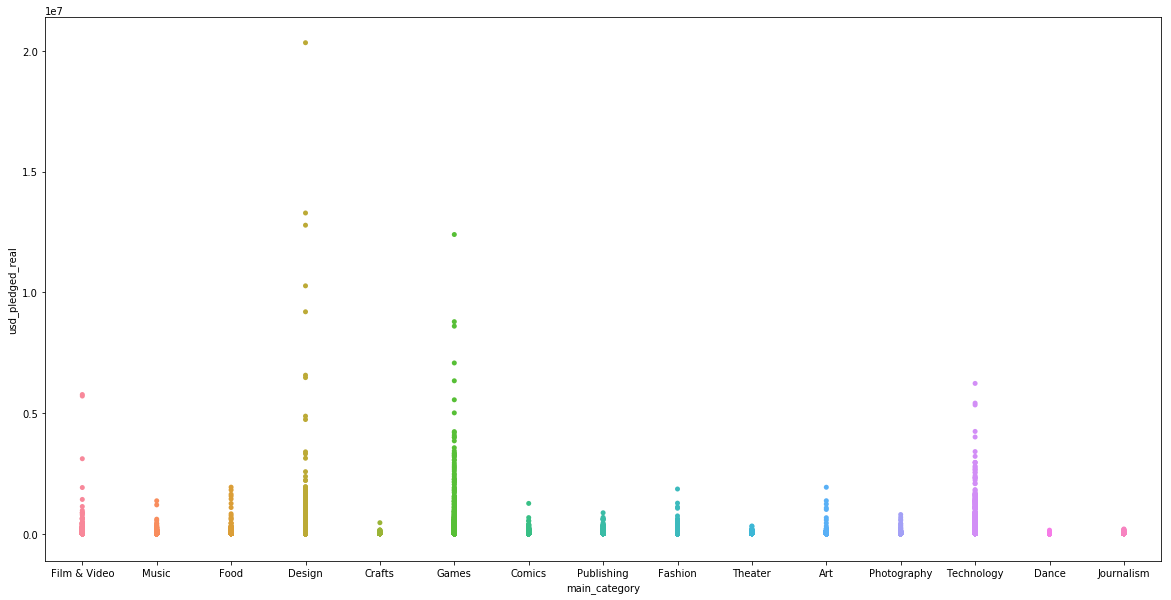

In [14]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
sns.stripplot(x="main_category", y="usd_pledged_real",data=KickStarterDataUS);

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


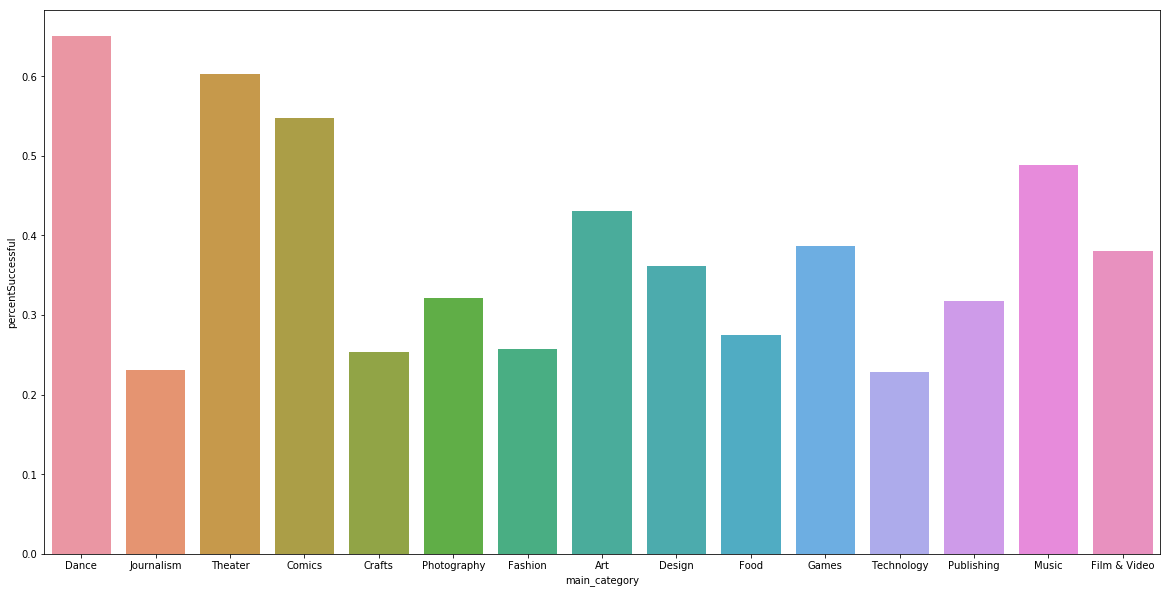

In [15]:
plt.subplots(figsize=(20,10))
sns.barplot(x="main_category", y="percentSuccessful", data=df_successvsunsuccess)

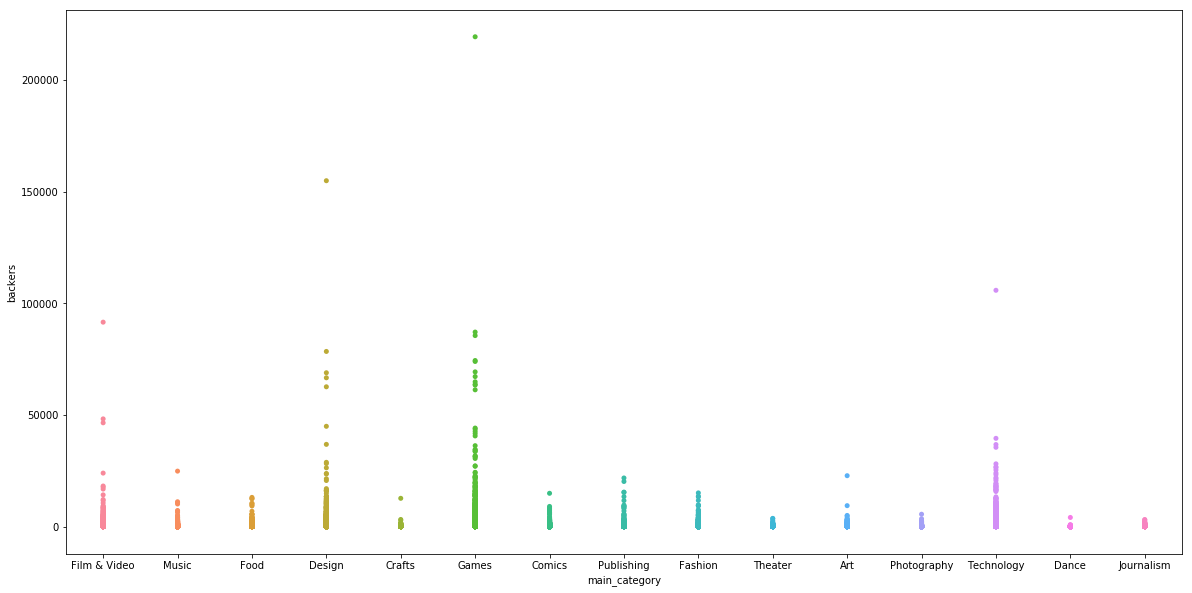

In [16]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
sns.stripplot(x="main_category", y="backers",data=KickStarterDataUS);

In [111]:
# Let's Boil down these columns to the most impactful ,numeric columns.
FinalKickStarterData = KickStarterDataUS
#FinalKickStarterData.head(20)
FinalKickStarterData = FinalKickStarterData.drop('currency',1)
FinalKickStarterData = FinalKickStarterData.drop('launched',1)
FinalKickStarterData = FinalKickStarterData.drop('country',1)
FinalKickStarterData = FinalKickStarterData.drop('usd_pledged_real',1)
FinalKickStarterData = FinalKickStarterData.drop('usd pledged',1)
FinalKickStarterData = FinalKickStarterData.drop('usd_goal_real',1)
FinalKickStarterData = FinalKickStarterData.drop('name',1)
FinalKickStarterData = FinalKickStarterData.drop('deadline',1)
FinalKickStarterData = FinalKickStarterData.drop('ID',1)
FinalKickStarterData['binary_state'] = np.where(FinalKickStarterData['state'] == 'successful', 1, 0)
FinalKickStarterData['binary_met_goal'] = np.where(FinalKickStarterData['metgoal'] == True, 1, 0)
FinalKickStarterData = FinalKickStarterData.drop('state',1)
FinalKickStarterData = FinalKickStarterData.drop('metgoal',1)
FinalKickStarterData = FinalKickStarterData.drop('goalvspledged',1)
FinalKickStarterData = FinalKickStarterData.drop('binary_met_goal',1)
FinalKickStarterData = FinalKickStarterData.drop('category',1)

FinalKickStarterData.head(20)


,main_category,goal,pledged,backers,launched_diff,binary_state
1,Film & Video,30000.0,2421.00,15,-59.802813,0
2,Film & Video,45000.0,220.00,3,-44.985532,0
3,Music,5000.0,1.00,1,-29.858206,0
4,Film & Video,19500.0,1283.00,14,-55.642326,0
5,Food,50000.0,52375.00,224,-34.431632,1
6,Food,1000.0,1205.00,16,-19.228657,1
7,Food,25000.0,453.00,40,-44.163056,0
8,Design,125000.0,8233.00,58,-34.239780,0
9,Film & Video,65000.0,6240.57,43,-29.086250,0
11,Music,12500.0,12700.00,100,-29.720162,1


In [112]:
#FinalKickStarterData = pd.get_dummies(FinalKickStarterData, columns = ['category'])
FinalKickStarterData = pd.get_dummies(FinalKickStarterData, columns = ['main_category'])
FinalKickStarterDataCopy = FinalKickStarterData
Y_LogisticRegressionTest = FinalKickStarterData['binary_state']
FinalKickStarterData.drop('binary_state',1)

,goal,pledged,backers,launched_diff,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
1,30000.0,2421.00,15,-59.802813,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,45000.0,220.00,3,-44.985532,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5000.0,1.00,1,-29.858206,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,19500.0,1283.00,14,-55.642326,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,50000.0,52375.00,224,-34.431632,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1000.0,1205.00,16,-19.228657,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,25000.0,453.00,40,-44.163056,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,125000.0,8233.00,58,-34.239780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,65000.0,6240.57,43,-29.086250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,12500.0,12700.00,100,-29.720162,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(
    FinalKickStarterData,
    Y_LogisticRegressionTest, 
    test_size = 0.25,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(221523, 20) (221523,)
(73842, 20) (73842,)


In [114]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

dfTest = pd.DataFrame(FinalKickStarterData.columns.values)




import sklearn.feature_selection as fs
model_accuracy = fs.f_regression(X_test, Y_test, True)
print(model_accuracy)

dfTest['Coefficient'] = logreg.coef_[0]
dfTest['PValue'] = model_accuracy[1]
dfTest.sort_values(by=['Coefficient'],ascending=False).head(30)
#print(len(logreg.coef_))
#print(logreg.coef_)

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#logit_model=sm.Logit(Y_LogisticRegressionTest,FinalKickStarterData)
#result=logit_model.fit()
#print(result.summary())





(array([  4.22423307e+01,   1.24815747e+03,   2.07509862e+03,
         7.28648480e+01,  -3.53772124e+18,   9.84815991e+01,
         2.45658855e+02,   1.26584277e+02,   2.79591184e+02,
         6.93438462e+00,   2.50435208e+02,   3.61383712e+00,
         2.58696532e+02,   5.40219550e-01,   9.47633025e+01,
         7.37619304e+02,   2.92817619e+01,   1.08146254e+02,
         5.71772044e+02,   5.04006608e+02]), array([  8.11470286e-011,   3.87588496e-271,   0.00000000e+000,
         1.41425050e-017,   1.00000000e+000,   3.39225072e-023,
         2.81929135e-055,   2.42026307e-029,   1.20269784e-062,
         8.45717627e-003,   2.58408141e-056,   5.73046577e-002,
         4.14549834e-058,   4.62344086e-001,   2.21326022e-022,
         1.23686558e-161,   6.27761195e-008,   2.59922251e-025,
         6.97849481e-126,   3.01659732e-111]))


,0,Coefficient,PValue
2,backers,0.018867,0.000000e+00
4,binary_state,0.001673,1.000000e+00
1,pledged,0.001090,3.875885e-271
3,launched_diff,0.000595,1.414251e-17
15,main_category_Music,0.000135,1.236866e-161
11,main_category_Film & Video,0.000123,5.730466e-02
19,main_category_Theater,0.000085,3.016597e-111
5,main_category_Art,0.000052,3.392251e-23
8,main_category_Dance,0.000033,1.202698e-62
6,main_category_Comics,0.000027,2.819291e-55


In [115]:
XNew = FinalKickStarterData;
Y_LinearRegressionTest = Y_LogisticRegressionTest
lm = linear_model.LinearRegression()
model = lm.fit(XNew,Y_LinearRegressionTest)



In [73]:
predictions = lm.predict(XNew)
#print(predictions)
len(predictions)
Y_LinearRegressionTest.head(20)
print ( model.coef_)

[ -5.71806006e-20  -2.45300742e-18  -5.88071258e-16  -4.77395901e-15
   1.00000000e+00   2.70283795e-11  -1.81099580e-12   1.05364328e-11
  -3.00008018e-10  -5.81227774e-14  -2.11325069e-10  -2.58090320e-11
  -3.10852333e-11   1.16822108e-11  -2.64663715e-10  -6.73891793e-11
  -1.40278587e-12   2.40166298e-10   2.79380294e-10  -7.97137584e-11
   1.30629121e-11  -4.86391199e-11  -1.71821001e-11  -2.05366641e-11
  -1.02169088e-10  -3.56945745e-12  -2.25933416e-11   5.85347977e-11
  -8.13654803e-11  -2.93852652e-10  -8.84801191e-11   2.25326268e-12
   2.65116369e-10   2.49258591e-11   2.62252892e-10  -9.02425946e-11
   1.02586160e-11  -2.00247700e-11  -1.47081882e-11  -1.34503702e-11
  -7.08373551e-11   4.44222482e-10   1.13288805e-11   2.11685087e-11
  -2.00602576e-10  -1.38278895e-10   2.36903655e-10  -8.20513202e-11
  -5.03187188e-11   2.17542919e-10  -2.49115346e-10   6.00783264e-11
  -7.77902083e-11  -3.54558933e-10   2.00470000e-10   2.59290621e-10
   2.75327186e-10   3.20762375e-11

In [ ]:
sns.regplot(x='goal', y='binary_state', data=FinalKickStarterDataCopy, logistic=True)

In [ ]:
#Try to Model using TensorFlow, initial y = Wx + b
n = 5 # Total Features to Model
rowsofData = len(KickStarterDataUS.index)
x = tf.placeholder(tf.float32,[rowsOfData,n])
W = tf.Variable(tf.zeros([n,1]))
b = tf.Variable(tf.zeros([1]))
product = tf.matmul(x,W)
y = product + b
y_hat = tf.placeholder(tf.float32,[None,1])
cost_func = tf.reduce_mean(tf.square(y_hat - y))
for i in 100:
    
